## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error
import math
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.gaussian_process import GaussianProcessClassifier

## Luxury Loan Portfolio Path:
Level 1: Exploring (1 point per task)
1. What are the min, max, and median funded amounts?
2. What are the min, max, and average interest rates?
3. What are the min, max, and median, average property value?
4. What are the different “durations months” for the loans and how many loans are under each one?
5. What are the different purposes for the luxury loans and how many loans are there per purpose?
6. What are the 3 most common “total units” found in a property?
7. What are the 3 most common “building class categories” loans are taken for?

In [2]:
luxury_loan_data = pd.read_csv('LuxuryLoanPortfolio.csv')
luxury_loan_data = luxury_loan_data.set_index('loan_id')
luxury_loan_data.head()

,funded_amount,funded_date,duration years,duration months,10 yr treasury index date funded,interest rate percent,interest rate,payments,total past payments,loan balance,...,BUILDING CLASS AT PRESENT,ADDRESS 1,ADDRESS 2,ZIP CODE,CITY,STATE,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,TAX CLASS AT TIME OF SALE
loan_id,,,,,,,,,,,,,,,,,,,,,
LL0000076,790000.0,2012-04-27,20,240,1.96,3.359,0.03359,4524.65,92,373732.18,...,R1,171 SOUTH 9TH STREET,9,10001,New York City,NY,1,0,0,2
LL0000151,1720000.0,2014-10-14,15,180,2.21,3.508,0.03508,12302.74,62,957230.24,...,R3,1242 E 80TH ST,19,10104,New York City,NY,1,0,0,1
LL0000161,3720000.0,2014-06-07,15,180,2.60,3.896,0.03896,27322.92,66,1916687.35,...,R3,1884 53RD STREET,2,10029,New York City,NY,1,0,0,1
LL0000175,1079000.0,2012-02-23,20,240,1.99,3.389,0.03389,6196.40,94,496538.75,...,R1,79 EAGLE STREET,6,10010,New York City,NY,1,0,0,2
LL0000178,2028000.0,2016-04-01,20,240,1.79,3.188,0.03188,11439.05,45,1513242.57,...,RW,34 NORTH 7TH STREET,5,10172,New York City,NY,1,0,0,4


1. What are the min, max, and median funded amounts?

In [3]:
print('min funded amounts is',luxury_loan_data['funded_amount'].min())
print('max funded amounts is',luxury_loan_data['funded_amount'].max())
print('median funded amounts is',luxury_loan_data['funded_amount'].median())

min funded amounts is 440000.0
max funded amounts is 156000000.0
median funded amounts is 1490000.0


2. What are the min, max, and average interest rates?

In [4]:
print('min interest rate is',luxury_loan_data['interest rate'].min())
print('max interest rate is',luxury_loan_data['interest rate'].max())
print('mean interest rate is',luxury_loan_data['interest rate'].mean())

min interest rate is 0.02648
max interest rate is 0.04828
mean interest rate is 0.038003945172824787


3. What are the min, max, and median, average property value?

In [5]:
print('min property value is',luxury_loan_data['property value'].min())
print('max property value is',luxury_loan_data['property value'].max())
print('mean property value is',luxury_loan_data['property value'].mean())
print('median property value is',luxury_loan_data['property value'].median())

min property value is 473200.0
max property value is 156020900.0
mean property value is 2012218.831942789
median property value is 1653925.0


4. What are the different “durations months” for the loans and how many loans are under each one?

In [6]:
luxury_loan_data['duration months'].value_counts()

360    1369
180     255
240      48
120       6
Name: duration months, dtype: int64

5. What are the different purposes for the luxury loans and how many loans are there per purpose?

In [7]:
luxury_loan_data['purpose'].value_counts()

investment property    536
home                   533
commerical property    520
boat                    62
plane                   27
Name: purpose, dtype: int64

6. What are the 3 most common “total units” found in a property?

In [8]:
luxury_loan_data['TOTAL UNITS'].value_counts().head(3)

1    1189
4     161
6     107
Name: TOTAL UNITS, dtype: int64

7. What are the 3 most common “building class categories” loans are taken for?

In [9]:
luxury_loan_data['BUILDING CLASS CATEGORY'].value_counts().head(3)

15 CONDOS - 2-10 UNIT RESIDENTIAL              466
07 RENTALS - WALKUP APARTMENTS                 367
04 TAX CLASS 1 CONDOS                          348
Name: BUILDING CLASS CATEGORY, dtype: int64

## Level 2: Analyzing (3 points per task)
1. Create bins for property value:
a. '-1M'
b. '1M-2M'
c. '2M-3M'
d. '3M+'
2. Create bins for employment length:
a. '-5'
b. '5-10'
c. '10-15'
d. '15+'
3. Analyze how interest rates differ according to different loan purposes. Visualize this.
4. Identify the building class category that is most profitable.
a. Using funded amount and interest rate
5. Which "purpose" generates the most value?

In [3]:
luxury_loan_data['property_value_bins'] = ''

luxury_loan_data['property_value_bins'] = np.where(luxury_loan_data['property value'] < 1000000,
                                                  '-1M',luxury_loan_data['property_value_bins'])
luxury_loan_data['property_value_bins'] = np.where((luxury_loan_data['property value'] >= 1000000)
                                                   & (luxury_loan_data['property value'] < 2000000),
                                                  '1M-2M',luxury_loan_data['property_value_bins'])
luxury_loan_data['property_value_bins'] = np.where((luxury_loan_data['property value'] >= 2000000)
                                                   & (luxury_loan_data['property value'] < 3000000),
                                                  '2M-3M',luxury_loan_data['property_value_bins'])
luxury_loan_data['property_value_bins'] = np.where((luxury_loan_data['property value'] >= 3000000),
                                                  '3M+',luxury_loan_data['property_value_bins'])

2. Create bins for employment length:
a. '-5'
b. '5-10'
c. '10-15'
d. '15+

In [4]:
luxury_loan_data['employment_length_bins'] = ''

luxury_loan_data['employment_length_bins'] = np.where(luxury_loan_data['employment length'] < 5,
                                                  '-5',luxury_loan_data['employment_length_bins'])
luxury_loan_data['employment_length_bins'] = np.where((luxury_loan_data['employment length'] >= 5)
                                                   & (luxury_loan_data['employment length'] < 10),
                                                  '5-10',luxury_loan_data['employment_length_bins'])
luxury_loan_data['employment_length_bins'] = np.where((luxury_loan_data['employment length'] >= 10)
                                                   & (luxury_loan_data['employment length'] < 15),
                                                  '10-15',luxury_loan_data['employment_length_bins'])
luxury_loan_data['employment_length_bins'] = np.where((luxury_loan_data['employment length'] >= 15),
                                                  '15+',luxury_loan_data['employment_length_bins'])

3. Analyze how interest rates differ according to different loan purposes. Visualize this.

In [12]:
loan_purpose = pd.DataFrame(luxury_loan_data.groupby(['purpose'])['interest rate'].mean())
loan_purpose

,interest rate
purpose,
boat,0.036180
commerical property,0.038126
home,0.038266
investment property,0.037938
plane,0.035971


<AxesSubplot:xlabel='purpose'>

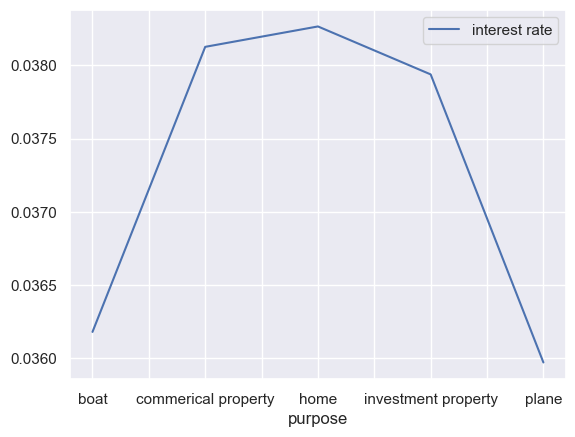

In [13]:
pd.DataFrame(luxury_loan_data.groupby(['purpose'])['interest rate'].mean()).plot()

Text(0.5, 1.0, 'Average Interest rate cross different purposes')

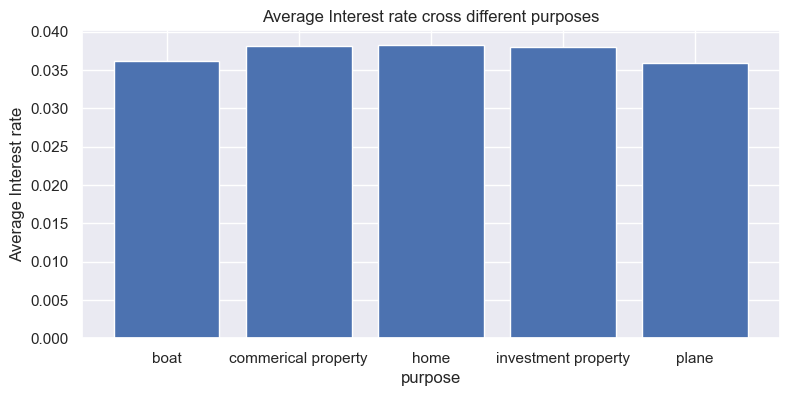

In [14]:
plt.figure(figsize=(9,4))
plt.bar(loan_purpose.index,loan_purpose['interest rate'])
plt.xlabel('purpose')
plt.ylabel('Average Interest rate')
plt.title('Average Interest rate cross different purposes')

4. Identify the building class category that is most profitable.

a. Using funded amount and interest rate

In [15]:
luxury_loan_data['profit'] = luxury_loan_data['funded_amount'] * luxury_loan_data['interest rate']

In [16]:
luxury_loan_data.groupby(['BUILDING CLASS CATEGORY'])['profit'].sum().sort_values(ascending=False).head(1)

BUILDING CLASS CATEGORY
15 CONDOS - 2-10 UNIT RESIDENTIAL              3.408544e+07
Name: profit, dtype: float64

5. Which "purpose" generates the most value?

In [17]:
luxury_loan_data.groupby(['purpose'])['profit'].sum().sort_values(ascending=False).head(1)

purpose
investment property    3.544920e+07
Name: profit, dtype: float64

## Level 3: Modeling
1. Create a model to predict the “property value” (15 points)
a. Try out at least 3 different models, and comment on why you chose these models
b. Measure accuracy (at least one model should have accuracy of 80% or higher)
2. Create a model to predict the transaction “employment length” (5 points)
a. Try out at least 3 different models, and comment on why you chose these models
b. Measure accuracy (at least one model should have accuracy of 80% or higher)
3. Time to clean up your work. Organize your notebook, gather your findings, prepare recommendations and
get ready to present them.

In [6]:
raw_data = luxury_loan_data.copy()

In [7]:
raw_data.isnull().sum()

funded_amount                        0
funded_date                          0
duration years                       0
duration months                      0
10 yr treasury index date funded     0
interest rate percent                0
interest rate                        0
payments                             0
total past payments                  0
loan balance                         0
property value                       0
purpose                              0
firstname                            0
middlename                           0
lastname                             0
social                               0
phone                                0
title                               12
employment length                    0
BUILDING CLASS CATEGORY              0
TAX CLASS AT PRESENT                 0
BUILDING CLASS AT PRESENT            0
ADDRESS 1                            0
ADDRESS 2                            0
ZIP CODE                             0
CITY                     

In [8]:
raw_data.fillna(raw_data['title'].mode()[0],inplace=True)

In [9]:
numeric_columns = [columns_names for columns_names in raw_data.columns if raw_data[columns_names].dtypes != 'object']

In [10]:
cat_col = [columns_names for columns_names in raw_data.columns if raw_data[columns_names].dtypes == 'object']

In [11]:
cat_col = [column_names for column_names in cat_col if len(raw_data[column_names].unique()) <= 7]

In [24]:
correlation = raw_data.corr()
k = 10
cols = correlation.nlargest(k,'property value')['property value'].index
corr_feat = pd.DataFrame(cols)
corr_feat.columns = ['Most Correlated Features']
corr_feat

,Most Correlated Features
0,property value
1,funded_amount
2,profit
3,payments
4,loan balance
5,TAX CLASS AT TIME OF SALE
6,10 yr treasury index date funded
7,interest rate percent
8,interest rate
9,TOTAL UNITS


<AxesSubplot:>

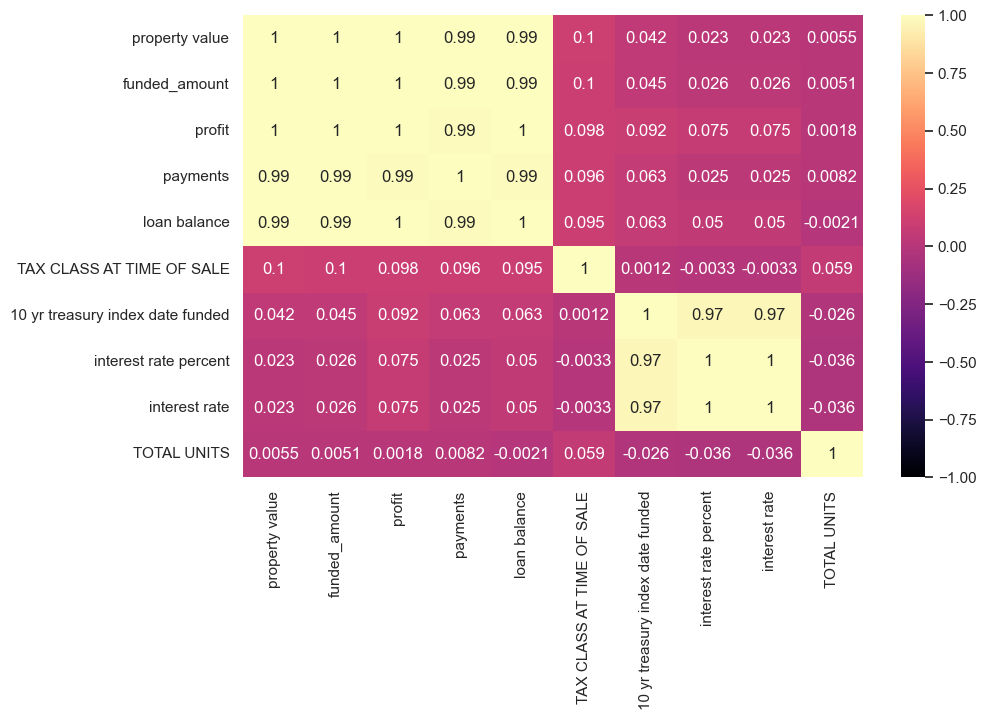

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(raw_data[cols].corr(),vmin=-1,vmax=1,annot=True,cmap='magma')

In [12]:
features = ['funded_amount','payments','loan balance','profit','property value'] + cat_col

In [13]:
features = numeric_columns + cat_col

In [14]:
raw_data = raw_data[features]

In [15]:
raw_data = pd.get_dummies(raw_data,columns=cat_col,drop_first=True)

In [16]:
inputs = raw_data.drop('property value',axis=1)
target = raw_data['property value']

In [17]:
x_train,x_test,y_train,y_test = train_test_split(inputs,target,test_size=0.15,random_state=1234)

In [18]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Model 1

In [33]:
model_1 = LinearRegression()
model_1.fit(x_train, y_train)

LinearRegression()

In [34]:
print("Linear Regression coefficients are: ",model_1.coef_)
print("Linear Regression y-intercept is: ",model_1.intercept_)

Linear Regression coefficients are:  [ 3.99422197e+06  5.97779263e+05  5.97779263e+05  4.68652963e+06
 -2.30476787e+06 -2.51246754e+06  9.02000906e+04  4.64803680e+04
  4.28371638e+04 -5.44237740e+03 -7.90431146e+02  1.15741763e+03
  3.93343541e+03  8.08032076e+04  8.74344347e+02  3.21468699e+03
  2.58282374e+03 -8.14044283e+02  1.25996353e+04  1.51811660e+04
  1.72065986e+04  5.46712148e+03  5.52673448e+03  2.03011309e+03]
Linear Regression y-intercept is:  2029792.0056100923


In [35]:
y_pred_1 = model_1.predict(x_test)
comp = pd.DataFrame({'Predicted': y_pred_1, 'Actual': y_test})

In [36]:
print("Linear Regression Model RMSE is: ", math.sqrt(mean_squared_error(y_test, y_pred_1)))
print("Linear Regression Model Training Score: ",model_1.score(x_train, y_train))
print("Linear Regression Model Testing Score: ",model_1.score(x_test, y_test))

Linear Regression Model RMSE is:  66563.63228013857
Linear Regression Model Training Score:  0.999760560592662
Linear Regression Model Testing Score:  0.9968411187323734


## Model_2

In [37]:
model_2 = RandomForestRegressor()

parameters=[{'n_estimators':[20,30,40,60,100], 'max_depth':  
             [5,10,15,20]},
             {'n_estimators':[20,30,40,60,100], 'max_depth': 
             [5,10,15,20],'max_features':[2,5,8]}]
             
grid_search = GridSearchCV(estimator=model_2,
                           param_grid=parameters,
                           cv=10,
                           n_jobs=-1)
                           
grid = grid_search.fit(x_train,y_train)
grid.best_score_,grid.best_params_

(0.902544450896985, {'max_depth': 20, 'n_estimators': 20})

In [88]:
model_2 = RandomForestRegressor(max_depth= 25, n_estimators= 3,random_state=42)
model_2.fit(x_train,y_train)

RandomForestRegressor(max_depth=25, n_estimators=3, random_state=42)

In [69]:
y_pred_2 = model_2.predict(x_test)
comp = pd.DataFrame({'Predicted': y_pred_2, 'Actual': y_test})
#comp

In [89]:
print(model_2.score(x_train, y_train))
print(model_2.score(x_test, y_test))

0.9996887453363672
0.9954136868462441


In [39]:
y_test

loan_id
LL0000654    1429550.0
LL0001346    1645050.0
LL0001700    1839300.0
LL0000090     986050.0
LL0000544    1719350.0
               ...    
LL0000966    1723700.0
LL0000577    1820850.0
LL0000606    2370150.0
LL0000179    2259300.0
LL0000776    1606700.0
Name: property value, Length: 252, dtype: float64

## Model_3

In [41]:
model_3 = KNeighborsRegressor(n_neighbors=2)
model_3.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=2)

In [42]:
y_pred_3 = model_3.predict(x_test)
comp = pd.DataFrame({'Predicted': y_pred_3, 'Actual': y_test})

In [43]:
print(model_3.score(x_train,y_train))
print(model_3.score(x_test,y_test))

0.7956587620253373
0.8684431642320916


2. Create a model to predict the transaction “employment length” (5 points)
a. Try out at least 3 different models, and comment on why you chose these models
b. Measure accuracy (at least one model should have accuracy of 80% or higher)

In [44]:
raw_data_2 = luxury_loan_data.copy()

In [45]:
raw_data_2.fillna(raw_data_2['title'].mode()[0],inplace=True)
numeric_columns = [columns_names for columns_names in raw_data_2.columns if raw_data_2[columns_names].dtypes != 'object']
cat_col = [columns_names for columns_names in raw_data_2.columns if raw_data_2[columns_names].dtypes == 'object']
cat_col = [column_names for column_names in cat_col if len(raw_data_2[column_names].unique()) <= 7]

In [46]:
le = LabelEncoder()
le.fit(raw_data_2['employment_length_bins'])

LabelEncoder()

In [47]:
raw_data_2['employment_length_bins'] = le.fit_transform(raw_data_2['employment_length_bins'])
raw_data_2['employment_length_bins'].unique()

array([3, 1, 0, 2])

In [48]:
features = numeric_columns + cat_col

In [49]:
raw_data_2 = raw_data_2[features]

In [50]:
raw_data_2 = pd.get_dummies(raw_data_2,drop_first=True)

In [51]:
inputs = raw_data_2.drop('employment_length_bins',axis=1)
target = raw_data_2['employment_length_bins']

In [52]:
x_train,x_test,y_train,y_test = train_test_split(inputs,target,test_size=0.15,random_state=1234)

## Model_1

In [53]:
model_1 = LogisticRegression(max_iter=300)
solvers = ['sag','lbfgs']
penalty = ['l2']
c_values = [0.01,0.1,0.2,0.5,0.8,10]


grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model_1, param_grid=grid, n_jobs=-1, cv=5, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)


print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']


for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.304326 using {'C': 0.8, 'penalty': 'l2', 'solver': 'lbfgs'}
0.292423 (0.009457) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'sag'}
0.302930 (0.016827) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
0.292423 (0.009457) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'sag'}
0.301526 (0.016866) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.292423 (0.009457) with: {'C': 0.2, 'penalty': 'l2', 'solver': 'sag'}
0.302223 (0.017687) with: {'C': 0.2, 'penalty': 'l2', 'solver': 'lbfgs'}
0.292423 (0.009457) with: {'C': 0.5, 'penalty': 'l2', 'solver': 'sag'}
0.302218 (0.021944) with: {'C': 0.5, 'penalty': 'l2', 'solver': 'lbfgs'}
0.293125 (0.009979) with: {'C': 0.8, 'penalty': 'l2', 'solver': 'sag'}
0.304326 (0.018614) with: {'C': 0.8, 'penalty': 'l2', 'solver': 'lbfgs'}
0.292423 (0.009457) with: {'C': 10, 'penalty': 'l2', 'solver': 'sag'}
0.300827 (0.014627) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}


C:\Users\Amro Ewes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
model_1 = LogisticRegression(C=0.8,penalty ='l2',solver = 'lbfgs',multi_class='multinomial')
model_1.fit(x_train,y_train)
target_1 = model_1.predict(x_test)
print(classification_report(y_test,target_1,target_names=['car', 'debt_consolidation', 'home', 'home_improvement']))
print(accuracy_score(y_test,target_1)*100)
print(list(le.inverse_transform([0,1,2,3])))

                    precision    recall  f1-score   support

               car       0.00      0.00      0.00        55
debt_consolidation       0.30      0.95      0.46        74
              home       0.00      0.00      0.00        47
  home_improvement       0.42      0.11      0.17        76

          accuracy                           0.31       252
         macro avg       0.18      0.26      0.16       252
      weighted avg       0.22      0.31      0.18       252

30.952380952380953
['-5', '10-15', '15+', '5-10']


C:\Users\Amro Ewes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Amro Ewes\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Amro Ewes\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set

## Model_2

In [55]:
model_2 = RandomForestClassifier(random_state=1234)
model_2.fit(x_train,y_train)
target_2 = model_2.predict(x_test)
print(classification_report(y_test,target_2,target_names=['-5' ,'10-15' ,'15+' ,'5-10']))
print(accuracy_score(y_test,target_2)*100)
print(le.inverse_transform([0,1,2,3]))

              precision    recall  f1-score   support

          -5       1.00      1.00      1.00        55
       10-15       1.00      1.00      1.00        74
         15+       1.00      1.00      1.00        47
        5-10       1.00      1.00      1.00        76

    accuracy                           1.00       252
   macro avg       1.00      1.00      1.00       252
weighted avg       1.00      1.00      1.00       252

100.0
['-5' '10-15' '15+' '5-10']


## Model_3

In [56]:
model_3 = xgb.XGBClassifier()
model_3.fit(x_train,y_train)
target_3 = model_3.predict(x_test)
print(classification_report(y_test,target_3,target_names=['-5' ,'10-15' ,'15+' ,'5-10']))
print(accuracy_score(y_test,target_3)*100)

              precision    recall  f1-score   support

          -5       1.00      1.00      1.00        55
       10-15       1.00      1.00      1.00        74
         15+       1.00      1.00      1.00        47
        5-10       1.00      1.00      1.00        76

    accuracy                           1.00       252
   macro avg       1.00      1.00      1.00       252
weighted avg       1.00      1.00      1.00       252

100.0
